## Final Project Submission

Please fill out:
* Student name: NICK MWAI NDUHIU
* Student pace:  part time 
* Scheduled project review date/time: 29TH APRIL 2025
* Instructor name: MWIKALI MARYANNE
* Blog post URL: 


# Project Overview


Evaluating aviation data to determine which type of aircraft to purchase for a business venture


## Introduction
Transport by air is considered the fastest and safest mode of travel. This is due to advancement in technology and the high level of skillset required all round in the sector. Every little detail counts in the aviation space.We are going to identify low risk aircraft for commercial and private use to provide guidance on which make and or model to buy for this venture. Data for this exercise is provided by the National Transportation Safety Board which includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.


In [89]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [90]:
# Loading the data set
aviation_data = pd.read_csv(
    r"C:\Users\Administrator\Documents\NickMoringaProject\Phase1\Assignments\project phase 1\practice-project-phase-1-\AviationData.csv",
    encoding='latin1'  
)
# Display the first few rows of the DataFrame to understand its structure
aviation_data.head()


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [91]:
#Shape of the DataFrame
aviation_data.shape

(88889, 31)

In [92]:
#Replacing the . in the column names with  to make them more readable
aviation_data.columns = aviation_data.columns.str.replace('.', '')
# Dispkay column names to confirm the changes
aviation_data.columns

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'Aircraftdamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberofEngines', 'EngineType', 'FARDescription', 'Schedule',
       'Purposeofflight', 'Aircarrier', 'TotalFatalInjuries',
       'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured',
       'WeatherCondition', 'Broadphaseofflight', 'ReportStatus',
       'PublicationDate'],
      dtype='object')

In [93]:
# Getting information about the DataFrame
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EventId               88889 non-null  object 
 1   InvestigationType     88889 non-null  object 
 2   AccidentNumber        88889 non-null  object 
 3   EventDate             88889 non-null  object 
 4   Location              88837 non-null  object 
 5   Country               88663 non-null  object 
 6   Latitude              34382 non-null  object 
 7   Longitude             34373 non-null  object 
 8   AirportCode           50249 non-null  object 
 9   AirportName           52790 non-null  object 
 10  InjurySeverity        87889 non-null  object 
 11  Aircraftdamage        85695 non-null  object 
 12  AircraftCategory      32287 non-null  object 
 13  RegistrationNumber    87572 non-null  object 
 14  Make                  88826 non-null  object 
 15  Model              

In [94]:
# Check for missing values in the DataFrame
aviation_data.isnull().sum()

EventId                     0
InvestigationType           0
AccidentNumber              0
EventDate                   0
Location                   52
Country                   226
Latitude                54507
Longitude               54516
AirportCode             38640
AirportName             36099
InjurySeverity           1000
Aircraftdamage           3194
AircraftCategory        56602
RegistrationNumber       1317
Make                       63
Model                      92
AmateurBuilt              102
NumberofEngines          6084
EngineType               7077
FARDescription          56866
Schedule                76307
Purposeofflight          6192
Aircarrier              72241
TotalFatalInjuries      11401
TotalSeriousInjuries    12510
TotalMinorInjuries      11933
TotalUninjured           5912
WeatherCondition         4492
Broadphaseofflight      27165
ReportStatus             6381
PublicationDate         13771
dtype: int64

In [95]:
#Filling missing values 
aviation_data = aviation_data.fillna("unknown")
aviation_data= aviation_data.replace("UNK", "unknown")
aviation_data= aviation_data.replace("N/A", "unknown")
aviation_data= aviation_data.replace("NAN", "unknown")
# Display the first few rows of the DataFrame to confirm changes
aviation_data.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,Purposeofflight,Aircarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight,ReportStatus,PublicationDate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,unknown,unknown,...,Personal,unknown,2,0,0,0,unknown,Cruise,Probable Cause,unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,unknown,unknown,...,Personal,unknown,4,0,0,0,unknown,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,unknown,unknown,...,Personal,unknown,3,unknown,unknown,unknown,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,unknown,unknown,unknown,unknown,...,Personal,unknown,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,unknown,unknown,unknown,unknown,...,Personal,unknown,1,2,unknown,0,VMC,Approach,Probable Cause,16-04-1980


In [96]:
#Getting the data info
aviation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EventId               88889 non-null  object
 1   InvestigationType     88889 non-null  object
 2   AccidentNumber        88889 non-null  object
 3   EventDate             88889 non-null  object
 4   Location              88889 non-null  object
 5   Country               88889 non-null  object
 6   Latitude              88889 non-null  object
 7   Longitude             88889 non-null  object
 8   AirportCode           88889 non-null  object
 9   AirportName           88889 non-null  object
 10  InjurySeverity        88889 non-null  object
 11  Aircraftdamage        88889 non-null  object
 12  AircraftCategory      88889 non-null  object
 13  RegistrationNumber    88889 non-null  object
 14  Make                  88889 non-null  object
 15  Model                 88889 non-null

In [97]:
#Find unknown values in the whole data set
aviation_data.isin(['unknown']).sum()


EventId                     0
InvestigationType           0
AccidentNumber              0
EventDate                   0
Location                   52
Country                   226
Latitude                54507
Longitude               54516
AirportCode             38659
AirportName             36109
InjurySeverity           1000
Aircraftdamage           3194
AircraftCategory        56604
RegistrationNumber       1336
Make                       64
Model                      96
AmateurBuilt              102
NumberofEngines          6084
EngineType               7078
FARDescription          57237
Schedule                80406
Purposeofflight          6192
Aircarrier              72242
TotalFatalInjuries      11401
TotalSeriousInjuries    12510
TotalMinorInjuries      11933
TotalUninjured           5912
WeatherCondition         5348
Broadphaseofflight      27165
ReportStatus             6381
PublicationDate         13771
dtype: int64

In [98]:
#Finding the unique values in the data set
aviation_data.nunique()


EventId                 87951
InvestigationType           2
AccidentNumber          88863
EventDate               14782
Location                27759
Country                   220
Latitude                25593
Longitude               27157
AirportCode             10375
AirportName             24871
InjurySeverity            110
Aircraftdamage              5
AircraftCategory           15
RegistrationNumber      79104
Make                     8237
Model                   12317
AmateurBuilt                3
NumberofEngines             8
EngineType                 13
FARDescription             31
Schedule                    3
Purposeofflight            27
Aircarrier              13590
TotalFatalInjuries        126
TotalSeriousInjuries       51
TotalMinorInjuries         58
TotalUninjured            380
WeatherCondition            4
Broadphaseofflight         13
ReportStatus            17076
PublicationDate          2925
dtype: int64

## Finding corelation between different variables to derive inferences


## 1. Does the number of engine have an impact in the investigation type and Number of Fatalities


In [99]:
#Grouping the data by unique values in the column 'investigationType'
aviation_data.groupby('InvestigationType').size()

InvestigationType
Accident    85015
Incident     3874
dtype: int64

In [100]:
#Fidning the unique values in the 'Number of Engines' column    
aviation_data['NumberofEngines'].unique()  

array([1.0, 'unknown', 2.0, 0.0, 3.0, 4.0, 8.0, 6.0], dtype=object)

In [101]:
#Dropping unknown values in the 'Number of Engines' column
aviation_data = aviation_data[aviation_data['NumberofEngines'] != 'unknown']
#Checking the unique values in the 'Number of Engines' column again
aviation_data['NumberofEngines'].unique()
#Dropping nan values in the 'Number of Engines' column
aviation_data = aviation_data.dropna(subset=['NumberofEngines'])
#Checking the unique values in the 'Number of Engines' column again
aviation_data['NumberofEngines'].unique()



array([1.0, 2.0, 0.0, 3.0, 4.0, 8.0, 6.0], dtype=object)

In [102]:
#Find relation between number of engines and the investigation type
# Create a new DataFrame with the relevant columns
accidents_data = aviation_data[['NumberofEngines', 'InvestigationType']].copy()
# Display the first few rows of the new DataFrame
accidents_data.head(10)


,NumberofEngines,InvestigationType
0,1,Accident
1,1,Accident
2,1,Accident
3,1,Accident
5,2,Accident
6,1,Accident
7,1,Accident
8,2,Accident
9,1,Accident
10,1,Accident


In [103]:
# Group the data by 'Number of Engines' and 'Investigation Type'
grouped_data = accidents_data.groupby(['NumberofEngines', 'InvestigationType']).size().reset_index(name='Count')
# Display the grouped data
print(grouped_data.head(10))


   NumberofEngines InvestigationType  Count
0              0.0          Accident   1205
1              0.0          Incident     21
2              1.0          Accident  69069
3              1.0          Incident    513
4              2.0          Accident   9405
5              2.0          Incident   1674
6              3.0          Accident    207
7              3.0          Incident    276
8              4.0          Accident    225
9              4.0          Incident    206


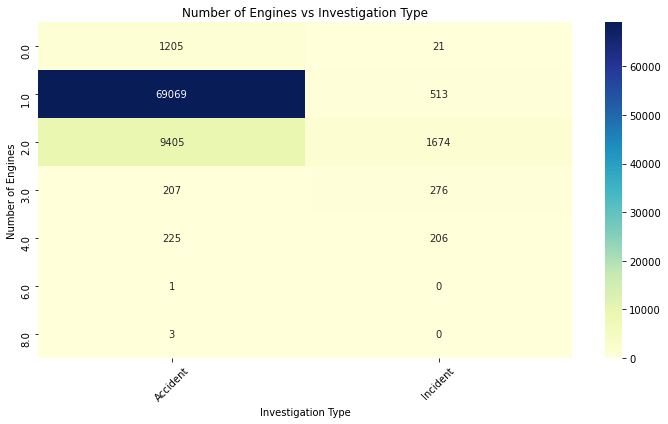

In [104]:
#Creating a pivot table to visualize the relationship between 'Number of Engines' and 'Investigation Type'
pivot_table = pd.pivot_table(grouped_data, values='Count', index='NumberofEngines', columns='InvestigationType', fill_value=0)
# Display the pivot table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Engines vs Investigation Type')
plt.xlabel('Investigation Type')
plt.ylabel('Number of Engines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this findings, we can clearly see that the more the enginges in a plane the less occurence of accidents and incidents thus have a recommendation to purchase aircrafts with more than two engines.

In [105]:
# Find the relationship between number of engines and the total fatalities
# Create a new DataFrame with the relevant columns
accidents_data_fatalities = aviation_data[['NumberofEngines', 'TotalFatalInjuries']].copy()
# Convert TotalFatalInjuries to numeric, coercing errors to NaN
aviation_data['TotalFatalInjuries'] = pd.to_numeric(aviation_data['TotalFatalInjuries'], errors='coerce')

# Remove rows with NaN or non-numeric 'NumberofEngines'
aviation_data = aviation_data.loc[pd.to_numeric(aviation_data['NumberofEngines'], errors='coerce').notnull()]

# Convert NumberofEngines to numeric
aviation_data.loc['NumberofEngines'] = pd.to_numeric(aviation_data['NumberofEngines'])

# Proceed with analysis
accidents_data_fatalities = aviation_data[['NumberofEngines', 'TotalFatalInjuries']].copy()
grouped_data_fatalities = accidents_data_fatalities.groupby(['NumberofEngines']).sum().reset_index()
print(grouped_data_fatalities.head(10))

#Group the data by 'Number of Engines' and 'Total Fatal Injuries'
grouped_data_fatalities = accidents_data_fatalities.groupby(['NumberofEngines']).sum().reset_index()
# Display the grouped data
print(grouped_data_fatalities.head(10))


   NumberofEngines  TotalFatalInjuries
0              0.0               409.0
1              1.0             22131.0
2              2.0             10521.0
3              3.0               878.0
4              4.0              1666.0
5              6.0                 0.0
6              8.0                 0.0
   NumberofEngines  TotalFatalInjuries
0              0.0               409.0
1              1.0             22131.0
2              2.0             10521.0
3              3.0               878.0
4              4.0              1666.0
5              6.0                 0.0
6              8.0                 0.0


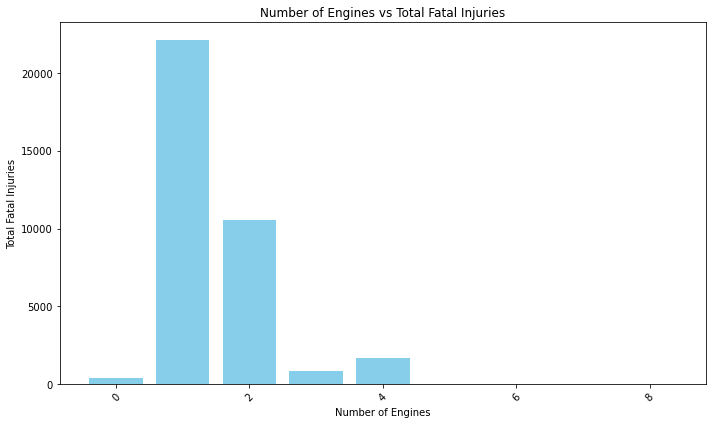

In [106]:
#Visualizing the relationship between number of engines and total fatalities
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_fatalities['NumberofEngines'], grouped_data_fatalities['TotalFatalInjuries'], color='skyblue')
plt.title('Number of Engines vs Total Fatal Injuries')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the data above , aircrafts with one engine are not advisable to purchase since their fatality rate is the highest

## 2. Aircraft category and Aircraft damage against total fatalities


In [107]:
# Group data by unique values in the colum AircraftCategory
aviation_data.groupby('AircraftCategory').size()


AircraftCategory
Airplane             24863
Balloon                166
Blimp                    4
Glider                 431
Gyrocraft              168
Helicopter            2912
Powered Parachute       87
Powered-Lift             4
Rocket                   1
ULTR                     1
Ultralight              26
Unknown                  4
WSFT                     9
Weight-Shift           154
unknown              53975
dtype: int64

In [108]:
#Removing unknown values in the 'Aircraft Category' column
aviation_data = aviation_data[aviation_data['AircraftCategory'] != 'unknown']
aviation_data = aviation_data[aviation_data['AircraftCategory'] != 'Unknown']
aviation_data = aviation_data.dropna(subset=['AircraftCategory'])
#Checking the unique values in the 'Aircraft Category' column again
aviation_data['AircraftCategory'].unique()


array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [109]:
#Finding the unique values in the 'Aircraft Damage' column
aviation_data['Aircraftdamage'].unique()


array(['Substantial', 'Destroyed', 'Minor', 'unknown', 'Unknown'],
      dtype=object)

In [110]:
#Dropping unknown values in the 'Aircraft Damage' column
aviation_data = aviation_data[aviation_data['Aircraftdamage'] != 'unknown']
aviation_data = aviation_data[aviation_data['Aircraftdamage'] != 'Unknown']
aviation_data = aviation_data.dropna(subset=['Aircraftdamage'])
#Checking the unique values in the 'Aircraft Damage' column again
aviation_data['Aircraftdamage'].unique()

array(['Substantial', 'Destroyed', 'Minor'], dtype=object)

In [111]:
#Finding relation between 'Aircraft Damage' and 'Aircraft Category'
# Create a new DataFrame with the relevant columns
accidents_data = aviation_data[['Aircraftdamage', 'AircraftCategory']].copy()
# Display the first few rows of the new DataFrame
print(accidents_data.head(10))

   Aircraftdamage AircraftCategory
5     Substantial         Airplane
7     Substantial         Airplane
8     Substantial         Airplane
12      Destroyed         Airplane
13      Destroyed         Airplane
14      Destroyed         Airplane
15      Destroyed         Airplane
16      Destroyed       Helicopter
17      Destroyed         Airplane
18    Substantial         Airplane


In [112]:
#Group the data by 'Aircraft Damage' and 'Aircraft Category'
grouped_data = accidents_data.groupby(['Aircraftdamage', 'AircraftCategory']).size().reset_index(name='Count')
# Display the grouped data
print(grouped_data.head(10))

  Aircraftdamage   AircraftCategory  Count
0      Destroyed           Airplane   2895
1      Destroyed            Balloon     11
2      Destroyed              Blimp      1
3      Destroyed             Glider     27
4      Destroyed          Gyrocraft     25
5      Destroyed         Helicopter    401
6      Destroyed  Powered Parachute      4
7      Destroyed       Powered-Lift      1
8      Destroyed             Rocket      1
9      Destroyed         Ultralight      5


In [113]:
#Find top 10 aircraft categories with the most accidents
top_10_aircraft_categories = aviation_data['AircraftCategory'].value_counts().head(10)
# Display the top 10 aircraft categories
print(top_10_aircraft_categories)

Airplane             24094
Helicopter            2871
Glider                 427
Gyrocraft              168
Weight-Shift           153
Balloon                100
Powered Parachute       84
Ultralight              25
WSFT                     9
Blimp                    4
Name: AircraftCategory, dtype: int64


In [114]:
#Find bottom 10 aircraft categories with the most accidents
bottom_10_aircraft_categories = aviation_data['AircraftCategory'].value_counts().tail(10)
# Display the bottom 10 aircraft categories
print(bottom_10_aircraft_categories)

Gyrocraft            168
Weight-Shift         153
Balloon              100
Powered Parachute     84
Ultralight            25
WSFT                   9
Blimp                  4
Powered-Lift           3
Rocket                 1
ULTR                   1
Name: AircraftCategory, dtype: int64


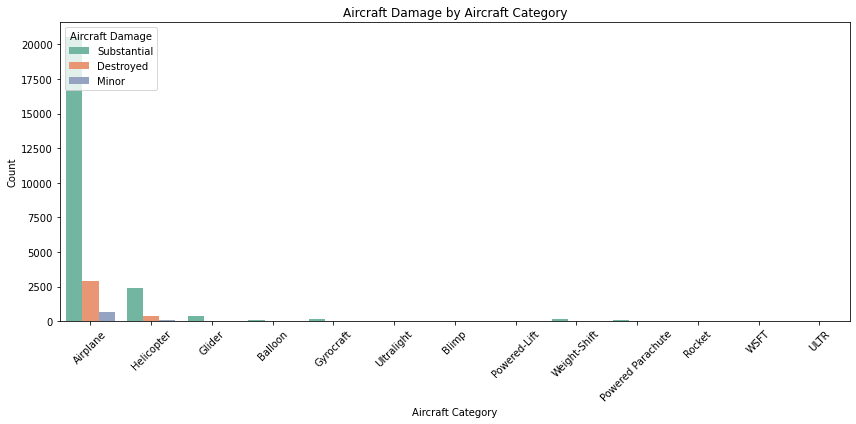

In [115]:
#Create a bar plot to visualize the relationship between 'Aircraft Damage' and 'Aircraft Category'
plt.figure(figsize=(12, 6))
sns.countplot(data=aviation_data, x='AircraftCategory', hue='Aircraftdamage', palette='Set2')
plt.title('Aircraft Damage by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()


In [116]:
#Group data by Aircarft category and the total fatalities
aviation_data.groupby('AircraftCategory').size()
aviation_data.groupby('TotalFatalInjuries').size()
aviation_data.groupby('AircraftCategory').sum()['TotalFatalInjuries']

AircraftCategory
Airplane             10105.0
Balloon                 16.0
Blimp                    0.0
Glider                  65.0
Gyrocraft               42.0
Helicopter            1096.0
Powered Parachute       12.0
Powered-Lift             0.0
Rocket                   1.0
ULTR                     0.0
Ultralight               6.0
WSFT                    10.0
Weight-Shift            65.0
Name: TotalFatalInjuries, dtype: float64

From this data , we can conclude that airplanes carry the highest risk factor as it has recorded high number of fatalities as compared to other aircraft categories.

## 3. Make and Model and Total Fatal Injuries

In [117]:
# Selecting make and model columns
make_model_data = aviation_data[['Make', 'Model']]
# how many times each pair (make and model) appears in an accidents.
make_model_counts = make_model_data.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Sorting Accident_Count from highest to lowest
make_model_counts = make_model_counts.sort_values(by='Accident_Count', ascending=False)

#top 10 accident-prone Make-Model combinations
top_10_make_model = make_model_counts.head(10)
# Display the top 10 accident-prone Make-Model combinations
print(top_10_make_model)


        Make Model  Accident_Count
2182  CESSNA   172             420
2777  Cessna   172             368
2766  Cessna   152             253
2206  CESSNA  172S             177
2174  CESSNA   152             176
2230  CESSNA   182             159
2202  CESSNA  172N             156
2802  Cessna  172N             152
2832  Cessna   182             146
6709   PIPER  PA28             146


In [127]:
# Normalize Make column BEFORE grouping
aviation_data['Make'] = aviation_data['Make'].str.upper()

# Group by Make and Model
make_model_counts = aviation_data.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Sort and get top 10
top_10_make_model = make_model_counts.sort_values(by='Accident_Count', ascending=False).head(10)


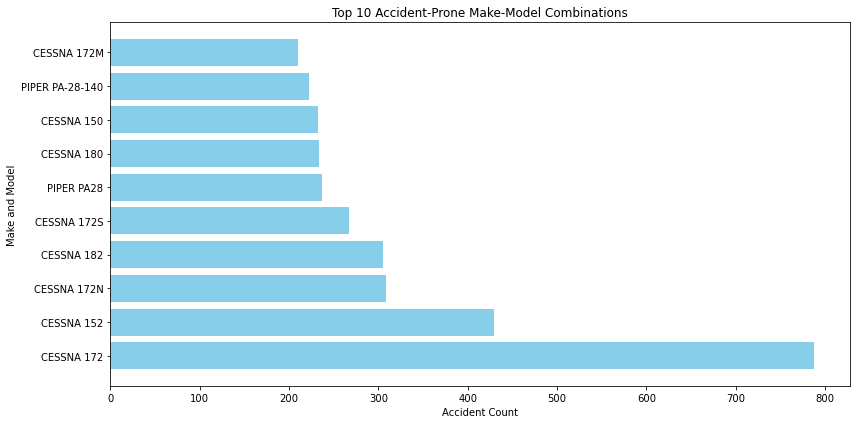

In [128]:
plt.figure(figsize=(12, 6))
plt.barh(
    top_10_make_model['Make'] + ' ' + top_10_make_model['Model'],
    top_10_make_model['Accident_Count'],
    color='skyblue'
)
plt.title('Top 10 Accident-Prone Make-Model Combinations')
plt.xlabel('Accident Count')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()


From above graph , we conclude that the Cessna make 172 recorded the highest number of accident count thereby rendering it not safe as compared to other models which ranked top 10 prone to accidents.

In [119]:
# Bottom 10 accident-prone Make-Model combinations
bottom_10_make_model = make_model_counts.tail(10)
# Display the bottom 10 accident-prone Make-Model combinations
print(bottom_10_make_model)


                                Make         Model  Accident_Count
3893  Ercoupe (eng & Research Corp.)  Ercoupe 415C               1
3892  Ercoupe (eng & Research Corp.)          415G               1
3891  Ercoupe (eng & Research Corp.)          415D               1
3889  Ercoupe (eng & Research Corp.)        415-CD               1
3887  Ercoupe (Eng & Research Corp.)         415-D               1
3885                         Ercoupe           F 1               1
3884                         Ercoupe    ERCO-415-E               1
3883                         Ercoupe          415D               1
3881                         Ercoupe         415-G               1
4652                    HEMP TIMOTHY    LEGACY 200               1


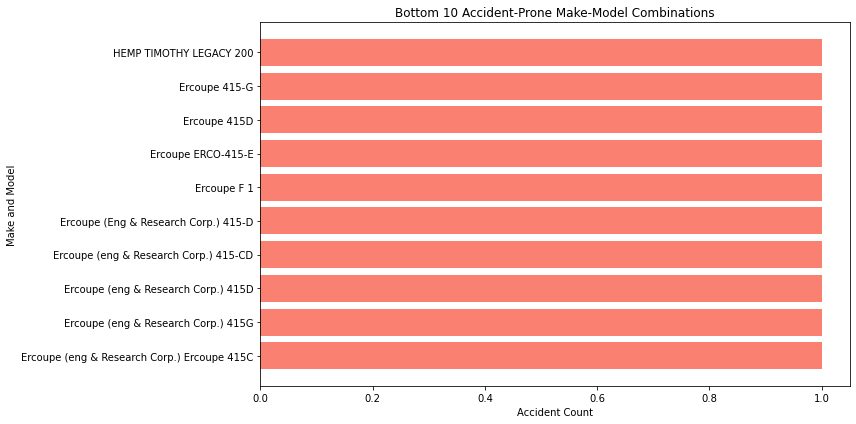

In [120]:
#Visualize the above data 
plt.figure(figsize=(12, 6))
plt.barh(bottom_10_make_model['Make'] + ' ' + bottom_10_make_model['Model'], bottom_10_make_model['Accident_Count'], color='salmon')
plt.title('Bottom 10 Accident-Prone Make-Model Combinations')
plt.xlabel('Accident Count')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()

We can conclude that all 10 aircraft model which featured on bottom 10 least prone to accidents are equal since all aircrafts had the same accident count.

In [129]:
aviation_data.to_csv("cleaned_aviation_data.csv", index=False, encoding='utf-8')
